In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
ANCHOR_NEG = '..\\anchor_neg_df.csv'
ANCHOR_POS = '..\\anchor_pos_df.csv'

In [16]:
anchor_neg_df = pd.read_csv(ANCHOR_NEG)
anchor_pos_df = pd.read_csv(ANCHOR_POS)

In [17]:
anchor_neg_df.drop(columns=['Unnamed: 0'], inplace=True)
anchor_pos_df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
anchor_pos_df.head()

,anchor,pos
0,data\KinFaceW\KinFaceW-I\mother-dau\md_031_1.jpg,data\KinFaceW\KinFaceW-I\mother-dau\md_031_2.jpg
1,data\KinFaceW\KinFaceW-I\mother-son\ms_055_2.jpg,data\KinFaceW\KinFaceW-I\mother-son\ms_055_1.jpg
2,data\KinFaceW\KinFaceW-I\father-son\fs_124_1.jpg,data\KinFaceW\KinFaceW-I\father-son\fs_124_2.jpg
3,data\KinFaceW\KinFaceW-I\father-dau\fd_124_2.jpg,data\KinFaceW\KinFaceW-I\father-dau\fd_124_1.jpg
4,data\KinFaceW\KinFaceW-I\father-dau\fd_055_2.jpg,data\KinFaceW\KinFaceW-I\father-dau\fd_055_1.jpg


In [19]:
anchor_neg_df.head()

,anchor,neg


In [25]:
data = {
    'index': [],
    'class': []
}

In [35]:
for row in anchor_pos_df.iterrows():
    metadata = row[1][1].split('\\')
    data['index'].append(int(metadata[4][3:6]))
    data['class'].append(metadata[3])

In [37]:
df = pd.DataFrame.from_dict(data)

In [38]:
df.head()

,index,class
0,31,mother-dau
1,55,mother-son
2,124,father-son
3,124,father-dau
4,55,father-dau


In [45]:
result = df['class'].value_counts()

In [77]:
result

father-son    1881
father-dau    1648
mother-son    1466
mother-dau    1465
Name: class, dtype: int64

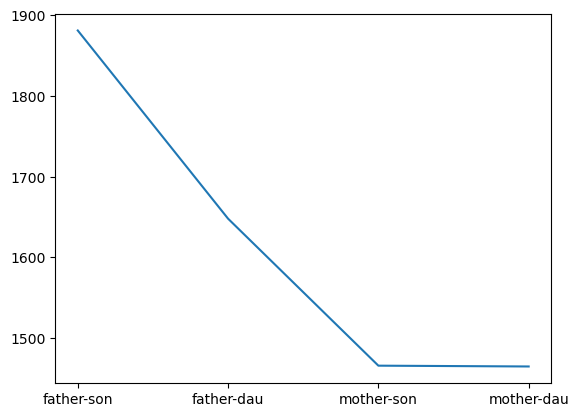

In [82]:
plt.plot(result, label=result.keys())
plt.show()

In [84]:
s = np.sum(result)
percent = result / s
print(percent)

father-son    0.291176
father-dau    0.255108
mother-son    0.226935
mother-dau    0.226780
Name: class, dtype: float64


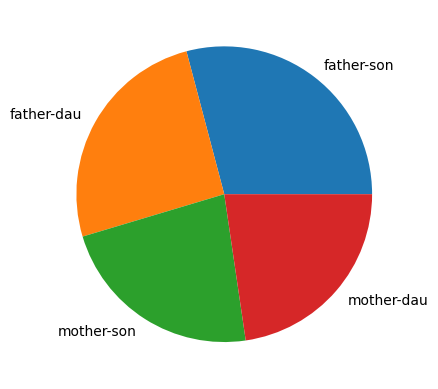

In [92]:
plt.pie(result, labels=result.keys())
plt.show()

In [107]:
classes = result.keys()
pics = {}

for class_name in classes:
    idx = df.loc[df['class'] == class_name]['index'].unique()
#     print(idx)
#     break
    pics[class_name] = np.array(idx)

In [145]:
len(pics['father-son']) + len(pics['father-dau']) + len(pics['mother-son']) + len(pics['mother-dau'])

106

In [110]:
REAL_DATA = '..\\data\\KinFaceWITestFolds.csv'

In [112]:
real_data_df = pd.read_csv(REAL_DATA)

In [141]:
all_triplets = {
    'parent': set(),
    'negative': set()
}

for row in real_data_df.iterrows():
#     print(row)
    parent = row[1][1].split('\\')
    child = row[1][2].split('\\')
    neg = row[1][3].split('\\')
#     print(parent[4][:6])
    all_triplets['parent'].add(parent[4][:6])
    all_triplets['negative'].add(child[4][:6])
#     break
#     data['index'].append(int(metadata[4][3:6]))
#     data['class'].append(metadata[3])

In [143]:
len(all_triplets['negative'])

106

In [146]:
real_data_df.shape

(44520, 4)

In [148]:
(1 - (106 / 44520)) * 100

99.76190476190476

In [166]:
105 * 2 * 2 * 106

44520